Importing Necessary Libraries

In [1]:
import pandas as pd
import csv

Loading the csv

In [2]:
file_path="Mall_Customers.csv"
data=pd.read_csv(file_path)

Getting the data information

In [3]:
data.info()
print("")
data.isnull().sum() #getting all the null values in each column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Genre                   197 non-null    object 
 2   Age                     190 non-null    float64
 3   Annual Income (k$)      190 non-null    float64
 4   Spending Score (1-100)  196 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 7.9+ KB



CustomerID                 0
Genre                      3
Age                       10
Annual Income (k$)        10
Spending Score (1-100)     4
dtype: int64

Making a branch of main data.

In [4]:
data_copy=data

Renaming the data columns for better readability

In [5]:
data_copy=data_copy.rename(columns={'Genre':'Gender','Annual Income (k$)' : 'Annual Income','Spending Score (1-100)' : 'Spending Score'})
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      200 non-null    int64  
 1   Gender          197 non-null    object 
 2   Age             190 non-null    float64
 3   Annual Income   190 non-null    float64
 4   Spending Score  196 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 7.9+ KB


**Checking Outliers using Box Plot**

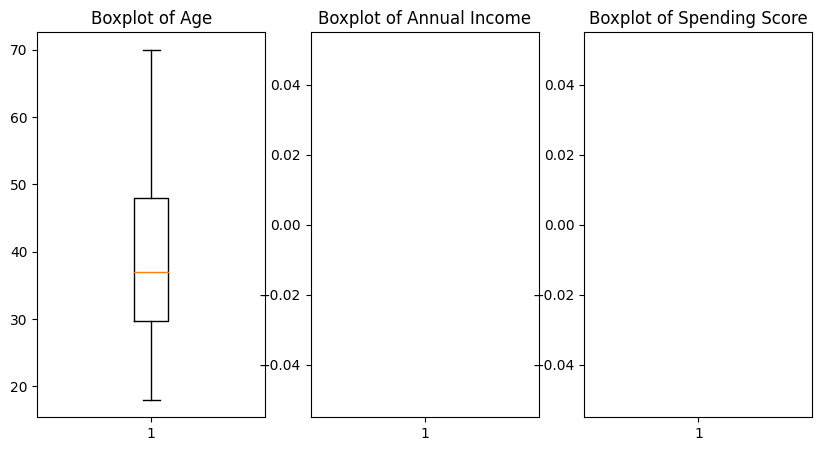

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.boxplot(data_copy['Age'])
plt.title('Boxplot of Age')

plt.subplot(1,3,2)
plt.boxplot(data_copy['Annual Income'])
plt.title('Boxplot of Annual Income')

plt.subplot(1,3,3)
plt.boxplot(data_copy['Spending Score'])
plt.title('Boxplot of Spending Score')

plt.show()

Seems to be an outlier in Annual Income column.

Getting the mean of the Age column and assigning the mean to the empty cell of the same column.

In [8]:
mean_age=data_copy['Age'].mean()  #38.89473684210526

data_copy['Age']=data_copy['Age'].fillna(mean_age)   #Filling the empty cells with the mean
data_copy['Age']=data_copy['Age'].astype(int)   #Converting all the values of the column into integer format

data_copy['Age'].isna().sum()  #Checking if there are any null values remaining

0

Getting the median of the Annual Income column and assigning the median to the empty cell of the same column.

Since  the column contains outliers, it would be better to use median instead of mean.

In [9]:
median_AnnualIncome=data_copy['Annual Income'].median()
data_copy['Annual Income'].fillna(median_AnnualIncome,inplace=True) #Filling the empty cells with the mean
data_copy['Annual Income']=data_copy['Annual Income'].astype(int) #Formatting the values of the data into integer format

data_copy['Annual Income'].isna().sum() #Checking if there are null values remaning

0

Getting the mean of the Spending Score column and assigning the mean to the empty cell of the same column.

In [10]:
mean_spending_score=data_copy['Spending Score'].mean() #50.28

data_copy['Spending Score']=data_copy['Spending Score'].fillna(mean_spending_score) #Filling the empty cells with the mean
data_copy['Spending Score']=data_copy['Spending Score'].astype(int) #Formatting all the values of the column into integer format

data_copy['Spending Score'].isna().sum()  #Checking if there are any null values remaining

0

Getting the mode of the Gender column since it is a categorical data and assigning the mode to the empty cell of the same column.

In [11]:
mode_gender=data_copy['Gender'].mode()[0] #Female

data_copy['Gender'].fillna(mode_gender,inplace=True) #Filling the empty cells with the mode
data_copy.isna().sum() #Checking if there are any null values remaining

CustomerID        0
Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

# Handling Outliers

**Getting Outliers from the dataset**

In [13]:
#Calculating IQR
Q1=data_copy[['Age','Annual Income','Spending Score']].quantile(0.25)
Q3=data_copy[['Age','Annual Income','Spending Score']].quantile(0.75)
IQR=Q3-Q1

data_copy_no_outliers_iqr = data_copy[~((data_copy[['Age', 'Annual Income','Spending Score']] < (Q1 - 1.5 * IQR)) | (data_copy[['Age', 'Annual Income','Spending Score']] > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Data without ooutliers: ")
print(data_copy_no_outliers_iqr)


print("Outliers identified using IQR method: ")
print(data_copy[((data_copy[['Age','Annual Income','Spending Score']] < (Q1-1.5*IQR)) | (data_copy[['Age','Annual Income','Spending Score']] > (Q3+1.5*IQR))).any(axis=1)])

Data without ooutliers: 
     CustomerID  Gender  Age  Annual Income  Spending Score
0             1    Male   19             15              39
1             2    Male   21             15              81
2             3  Female   20             16               6
3             4  Female   23             16              77
4             5  Female   31             17              40
..          ...     ...  ...            ...             ...
193         194  Female   38            113              91
194         195  Female   47            120              16
195         196  Female   35            120              79
196         197  Female   45            126              28
197         198    Male   32            126              74

[198 rows x 5 columns]
Outliers identified using IQR method: 
     CustomerID Gender  Age  Annual Income  Spending Score
198         199   Male   32            137              18
199         200   Male   30            137              83


Handling Outlier :
Since the number of outliers are less(0.1 %), we can remove them.

In [14]:
data_copy=data_copy_no_outliers_iqr
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, 0 to 197
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      198 non-null    int64 
 1   Gender          198 non-null    object
 2   Age             198 non-null    int64 
 3   Annual Income   198 non-null    int64 
 4   Spending Score  198 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.3+ KB


In [17]:
data_copy.head(10)

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [15]:
data_copy.to_csv('Mall_Customers_cleaned.csv',index=False) #Saving the cleaned data to a new csv file